# Simulations with Max-Sum, GF(2)

In [1]:
include("headers.jl");

## Convergence: decisional variables

### Fixed Rate

#### Normal

In [2]:
q = 2
n = 480
L = 1
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

In [3]:
sim1 = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
    navg=30, convergence=:decvars, maxiter=Int(1e3), nmin=300, verbose = false)

---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30


Simulation with n = 480, average over 30 trials
k = [200]
R = [0.42]
Total elapsed time: 3m 11s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 3m 10s. Average runtime per instance: 0m 6s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  30   │    7     │    23    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   7   │    7     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  23   │    0     │    23    │
└───────────────┴───────┴──────────┴──────────┘


Average distortion for instances that fulfill parity: 0.18


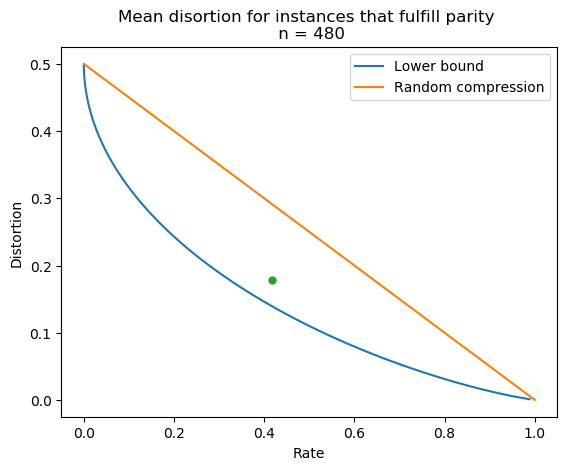

In [21]:
plot(sim1);

#### Varying L
See if there is an optimal value for L

In [15]:
Lvals = exp.(-2:0.6:4) # Log range
times = zeros(length(Lvals))
convergence_rate = zeros(length(Lvals))
q = 2
n = 480
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

In [16]:
for (l,L) in enumerate(Lvals)
    sim = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
        navg=60, convergence=:decvars, maxiter=Int(1e3), nmin=300, verbose = false)
    print(sim)
    times[l] = sim.totaltime
    convergence_rate[l] = sum(sim.converged[1])/length(sim.converged[1])
end

---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50
Finished iter 60
Simulation with n = 480, average over 60 trials
k = [200]
R = [0.42]
Total elapsed time: 6m 51s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 6m 51s. Average runtime per instance: 0m 7s
Average distortion for instances that fulfill parity: 0.17
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  60   │    12    │    48    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   9   │    9     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  51   │    3     │    48    │
└───────────────┴───────┴──────────┴──────────┘
---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50

Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50
Finished iter 60
Simulation with n = 480, average over 60 trials
k = [200]
R = [0.42]
Total elapsed time: 5m 46s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 5m 46s. Average runtime per instance: 0m 6s
Average distortion for instances that fulfill parity: 0.18
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  60   │    18    │    42    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │  18   │    18    │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  42   │    0     │    42    │
└───────────────┴───────┴──────────┴──────────┘
---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50
Finished iter 60
Simulatio

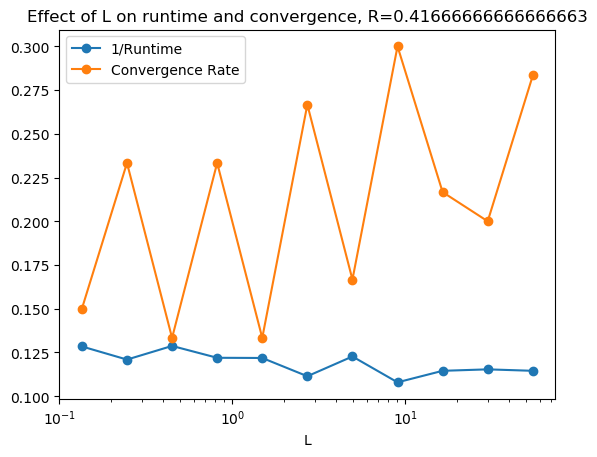

Values of L:[0.14, 0.25, 0.45, 0.82, 1.49, 2.72, 4.95, 9.03, 16.44, 29.96, 54.6]


In [17]:
semilogx(Lvals, 500/times, "o-")
semilogx(Lvals, convergence_rate, "o-")
plt.:xlabel("L")
plt.:legend(["1/Runtime", "Convergence Rate"])
plt.:title("Effect of L on runtime and convergence, R=$(1-m/n)")
println("Values of L:", round.(Lvals,digits=2))

#### With b-reduction
See if there is an optimal value for the number of removed leaves

In [12]:
B = collect(0:6)
dist = zeros(length(B))
convergence_rate = zeros(length(B))
q = 2
n = 480
L = 1.5
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

Remove b constraints

In [13]:
for (b_idx,b) in enumerate(B)
    println("-------------------------- b=$b --------------------------")
    sim = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
        navg=100, convergence=:decvars, maxiter=Int(1e3), nmin=300, b=b, verbose = false)
    print(sim)
    dist[b_idx] = distortions(sim)[1]
    convergence_rate[b_idx] = sum(sim.converged[1])/length(sim.converged[1])
end

-------------------------- b=0 --------------------------
---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50
Finished iter 60
Finished iter 70
Finished iter 80
Finished iter 90
Finished iter 100
Simulation with n = 480, average over 100 trials
k = [200]
R = [0.42]
Total elapsed time: 11m 28s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 11m 28s. Average runtime per instance: 0m 7s
Average distortion for instances that fulfill parity: 0.18
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  100  │    14    │    86    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │  14   │    14    │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  86   │    0     │    86    │
└───────────────┴───────┴────

---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50
Finished iter 60
Finished iter 70
Finished iter 80
Finished iter 90
Finished iter 100
Simulation with n = 480, average over 100 trials
k = [200]
R = [0.42]
Total elapsed time: 9m 54s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 9m 54s. Average runtime per instance: 0m 6s
Average distortion for instances that fulfill parity: 0.18
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  100  │    27    │    73    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │  27   │    27    │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  73   │    0     │    73    │
└───────────────┴───────┴──────────┴──────────┘


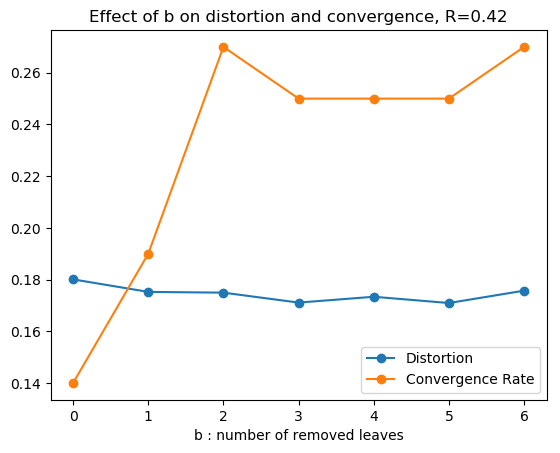

Values of b:[0, 1, 2, 3, 4, 5, 6]


In [14]:
plot(B, dist, "o-")
plot(B, convergence_rate, "o-")
plt.:xlabel("b : number of removed leaves")
plt.:legend(["Distortion", "Convergence Rate"])
plt.:title("Effect of b on distortion and convergence, R=$(round(1-m/n,digits=2))")
println("Values of b:", B)

#### Reinforcement
Try some values of gamma, with L=1.0, b=1

In [21]:
gamma = 0.02
q = 2
n = 960
L = 1
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))))

560

In [22]:
sim = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
    navg=1, convergence=:decvars, maxiter=Int(1e4), gamma=gamma, nmin=300, b=2, verbose = false)
print(sim)

---- Starting m = 560 ----
Simulation with n = 960, average over 1 trials
k = [400]
R = [0.42]
Total elapsed time: 2m 54s

---------------------------------------------
	    k = 400  /  R = 0.42
---------------------------------------------

Runtime: 2m 54s. Average runtime per instance: 2m 54s
Average distortion for instances that fulfill parity: 0.49
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │   1   │    1     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   1   │    1     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │   0   │    0     │    0     │
└───────────────┴───────┴──────────┴──────────┘


In [20]:
sim.rawdistortion

1-element Array{Array{Float64,1},1}:
 [0.5, 0.502083, 0.176042, 0.516667, 0.4625]

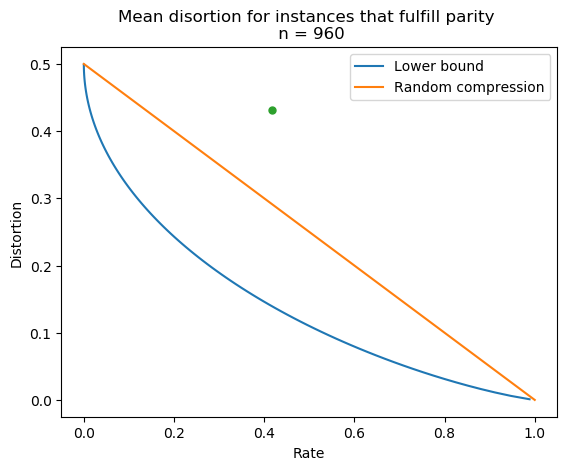

PyObject Text(0.5, 1.0, 'Mean disortion for instances that fulfill parity \n n = 960')

In [19]:
plot(sim)

In [45]:
Gamma = collect(0.02:0.02:0.16)
dist = zeros(length(Gamma))
convergence_rate = zeros(length(Gamma))
times = zeros(length(Gamma))
q = 2
n = 480
L = 1
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

In [46]:
for (gamma_idx, gamma) in enumerate(Gamma)
    println("-------------------------- gamma=$gamma --------------------------")
    sim = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
        navg=50, convergence=:decvars, maxiter=Int(1e3), gamma=gamma, nmin=300, b=1, verbose = false)
    print(sim)
    times[gamma_idx] = sim.totaltime
    dist[gamma_idx] = distortions(sim)[1]
    convergence_rate[gamma_idx] = sum(sim.converged[1])/length(sim.converged[1])
end

-------------------------- gamma=0.02 --------------------------
---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50
Simulation with n = 480, average over 50 trials
k = [200]
R = [0.42]
Total elapsed time: 11m 59s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 11m 59s. Average runtime per instance: 0m 14s
Average distortion for instances that fulfill parity: 0.17
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  50   │    8     │    42    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   8   │    8     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  42   │    0     │    42    │
└───────────────┴───────┴──────────┴──────────┘
-------------------------- gamma=0.04 ----------------------

Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50
Simulation with n = 480, average over 50 trials
k = [200]
R = [0.42]
Total elapsed time: 4m 43s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 4m 43s. Average runtime per instance: 0m 6s
Average distortion for instances that fulfill parity: 0.19
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  50   │    14    │    36    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │  32   │    14    │    18    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  18   │    0     │    18    │
└───────────────┴───────┴──────────┴──────────┘


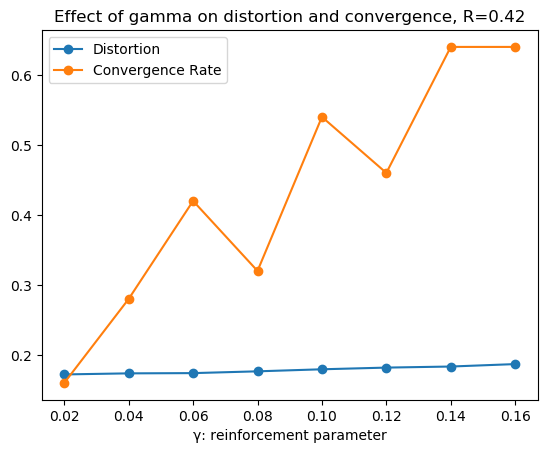

Values of gamma:[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16]


In [49]:
plot(Gamma, dist, "o-")
plot(Gamma, convergence_rate, "o-")
# plot(Gamma, 500/times, "o-")
plt.:xlabel("γ: reinforcement parameter")
plt.:legend(["Distortion", "Convergence Rate"#=, "Inverse runtime"=#])
plt.:title("Effect of gamma on distortion and convergence, R=$(round(1-m/n,digits=2))");
println("Values of gamma:", Gamma)

Cool! But from gamma=0.1 onwards, parity is not always fulfilled.

Distortion goes up a bit

### Varying Rate

In [39]:
q = 2
n = 420
L = 0.1
nedges = [n*2, n*2, n*2, n*2]
lambda = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
rho = [[0, 0.5, 0.5], [0, 0, 0.5, 0.5], [0, 0, 0, 0.5, 0.5], [0, 0, 0, 0, 0, 0.5, 0.5]]
[sum(rho[x][j]/j for j in eachindex(rho[x])) for x in eachindex(rho)]
m = Int.(round.([nedges[x]*sum(rho[x][j]/j for j in eachindex(rho[x])) for x in eachindex(rho)]));

In [40]:
sim2 = Simulation(MS(), q, n, m, L, nedges, lambda, rho, 
    navg=20, convergence=:decvars, maxiter=Int(1e3), nmin=300, verbose = false)

---- Starting m = 350 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
---- Starting m = 245 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
---- Starting m = 189 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20
---- Starting m = 130 ----
Finished iter 5
Finished iter 10
Finished iter 15
Finished iter 20


Simulation with n = 420, average over 20 trials
k = [70, 175, 231, 290]
R = [0.17, 0.42, 0.55, 0.69]
Total elapsed time: 9m 30s

---------------------------------------------
	    k = 70  /  R = 0.17
---------------------------------------------

Runtime: 1m 15s. Average runtime per instance: 0m 4s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  20   │    5     │    15    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   5   │    5     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  15   │    0     │    15    │
└───────────────┴───────┴──────────┴──────────┘
---------------------------------------------
	    k = 175  /  R = 0.42
---------------------------------------------

Runtime: 1m 47s. Average runtime per instance: 0m 5s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │


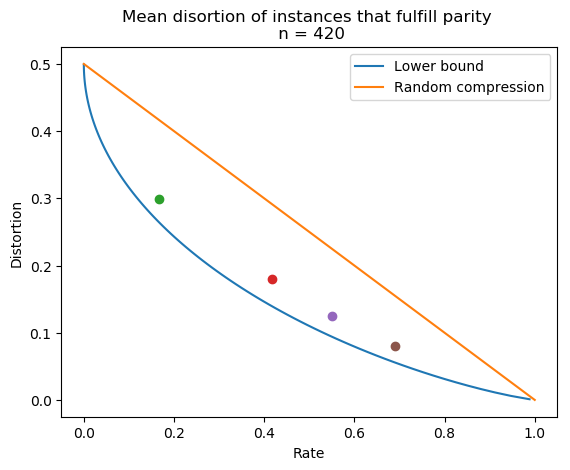

In [60]:
plot(sim2);

## Convergence: messages

### Fixed Rate

#### With b-reduction
Try with tol = 1e-7, removing b=3 leaves

In [30]:
q = 2
n = 480
L = 0.1
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

In [31]:
sim3 = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
    navg=50, convergence=:messages, maxiter=Int(1e4), tol=1e-7, b=3, verbose = false)

---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50


Simulation with n = 480, average over 50 trials
k = [200]
R = [0.42]
Total elapsed time: 72m 54s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 72m 54s. Average runtime per instance: 1m 27s
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  50   │    10    │    40    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │   9   │    9     │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  41   │    1     │    40    │
└───────────────┴───────┴──────────┴──────────┘


Average distortion for instances that fulfill parity: 0.18


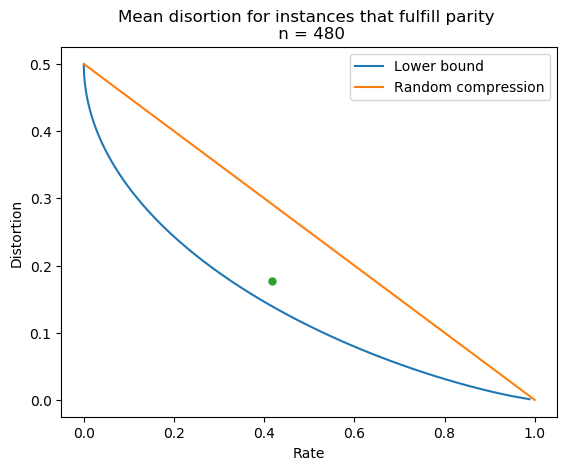

In [32]:
plot(sim3);

#### Reinforcement
Try some values of gamma, with L=1, b=1

In [2]:
Gamma = collect(0.00:0.01:0.04)
dist = zeros(length(Gamma))
convergence_rate = zeros(length(Gamma))
q = 2
n = 480
L = 1
nedges = n*2
lambda = [0.0, 1.0]
rho = [0.0, 0.0, 0.5, 0.5]
m = Int(round(nedges*(sum(rho[j]/j for j in eachindex(rho)))));

In [3]:
for (gamma_idx, gamma) in enumerate(Gamma)
    println("-------------------------- gamma=$gamma --------------------------")
    sim = Simulation(MS(), q, n, [m], L, [nedges], [lambda], [rho], 
        navg=100, convergence=:decvars, maxiter=Int(1e3), gamma=gamma, tol=1e-9, b=1, verbose = false)
    print(sim)
    dist[gamma_idx] = distortions(sim)[1]
    convergence_rate[gamma_idx] = sum(sim.converged[1])/length(sim.converged[1])
end

-------------------------- gamma=0.0 --------------------------
---- Starting m = 280 ----
Finished iter 10
Finished iter 20
Finished iter 30
Finished iter 40
Finished iter 50
Finished iter 60
Finished iter 70
Finished iter 80
Finished iter 90
Finished iter 100
Simulation with n = 480, average over 100 trials
k = [200]
R = [0.42]
Total elapsed time: 12m 45s

---------------------------------------------
	    k = 200  /  R = 0.42
---------------------------------------------

Runtime: 12m 44s. Average runtime per instance: 0m 8s
Average distortion for instances that fulfill parity: 0.18
┌───────────────┬───────┬──────────┬──────────┐
│               │ Total │ Parity Y │ Parity N │
├───────────────┼───────┼──────────┼──────────┤
│     Total     │  100  │    16    │    84    │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence Y │  16   │    16    │    0     │
├───────────────┼───────┼──────────┼──────────┤
│ Convergence N │  84   │    0     │    84    │
└───────────────┴──────

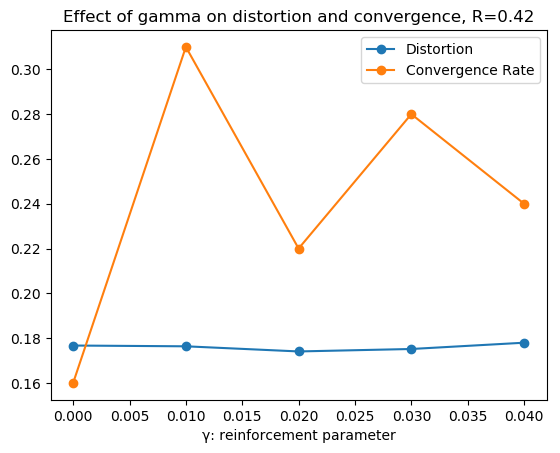

Values of gamma:[0.0, 0.01, 0.02, 0.03, 0.04]


In [4]:
plot(Gamma, dist, "o-")
plot(Gamma, convergence_rate, "o-")
plt.:xlabel("γ: reinforcement parameter")
plt.:legend(["Distortion", "Convergence Rate"#=, "Inverse runtime"=#])
plt.:title("Effect of gamma on distortion and convergence, R=$(round(1-m/n,digits=2))");
println("Values of gamma:", Gamma)